In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/workspace/data/y_trn.csv")
df_x = pd.read_csv("/workspace/data/X_trn.csv")
df = pd.concat([df, df_x], axis=1)
df_male = df[(df['year'] == 1980) & (df['gender'] == 'Male')]
df_female = df[(df['year'] == 1980) & (df['gender'] == 'Female')]

income = np.log1p(df_female['realrinc'].values)

In [9]:
mean_income = np.mean(income)
median_income = np.median(income)
std_dev_income = np.std(income)
min_income, max_income = np.min(income), np.max(income)

print("--- Income Data Statistics ---")
print(f"Mean:              ${mean_income:,.2f}")
print(f"Median:            ${median_income:,.2f}")
print(f"Standard Deviation:${std_dev_income:,.2f}")
print(f"Min / Max:         ${min_income:,.2f} / ${max_income:,.2f}")
print("--------------------------------")

--- Income Data Statistics ---
Mean:              $9.10
Median:            $9.52
Standard Deviation:$1.04
Min / Max:         $6.63 / $11.84
--------------------------------


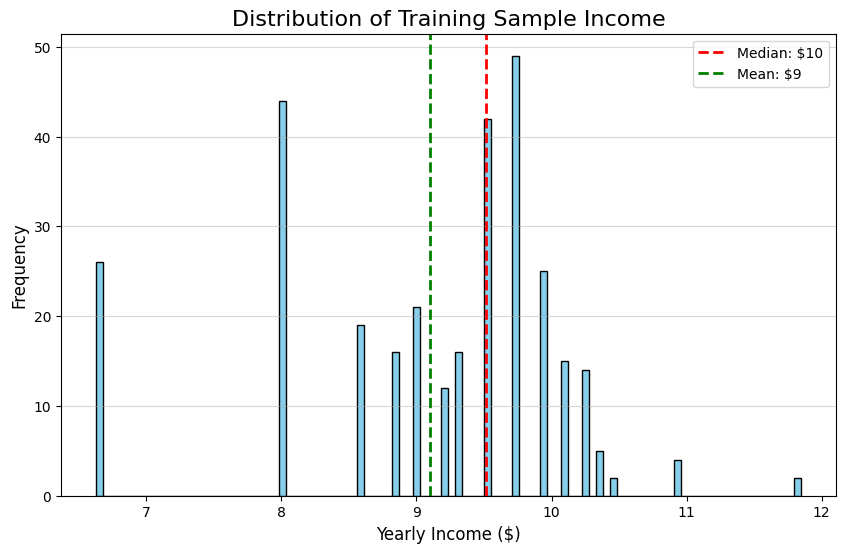

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(income, bins=100, color='skyblue', edgecolor='black')
plt.axvline(median_income, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_income:,.0f}')
plt.axvline(mean_income, color='green', linestyle='--', linewidth=2, label=f'Mean: ${mean_income:,.0f}')
plt.title('Distribution of Training Sample Income', fontsize=16)
plt.xlabel('Yearly Income ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

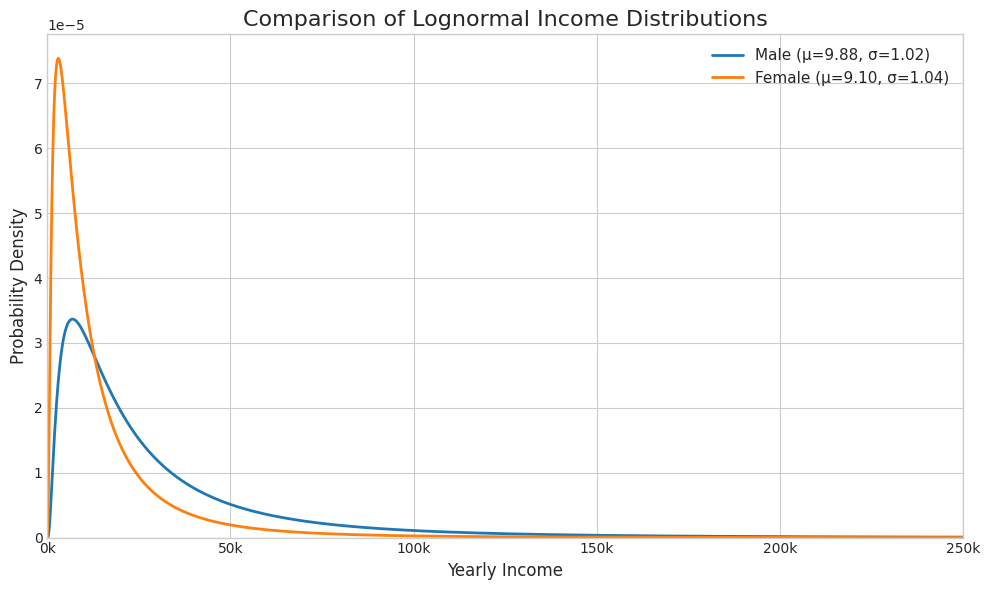

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parameters for the two distributions
params = {
    'Male': {'mu': 9.88013597, 'sigma': 1.02038403},
    'Female': {'mu': 9.09582673, 'sigma': 1.04223283}
}

# --- 1. Create a range of x-values for the plot ---
# We'll generate a wide range of income values to see the full shape
x = np.linspace(0, 250000, 1000)

# --- 2. Create the plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# --- 3. Calculate and plot each distribution ---
for label, p in params.items():
    mu = p['mu']
    sigma = p['sigma']
    
    # In scipy's lognorm, 's' is sigma, and 'scale' is exp(mu)
    pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
    
    # Plot the PDF
    ax.plot(x, pdf, label=f'{label} (μ={mu:.2f}, σ={sigma:.2f})', linewidth=2)

# --- 4. Customize the plot for clarity ---
ax.set_title('Comparison of Lognormal Income Distributions', fontsize=16)
ax.set_xlabel('Yearly Income', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.legend(fontsize=11)

# Format the x-axis to be more readable
ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda val, loc: f"{int(val/1000)}k")
)

# Set plot limits to focus on the main part of the distribution
ax.set_xlim(0, 250000)
ax.set_ylim(bottom=0)

plt.tight_layout()

# You can uncomment the line below to save the figure to a file
# plt.savefig('lognormal_distributions_comparison.png', dpi=300)

plt.show()

Number of simulations: 1000
Times male earned more than female: 601
Probability that a male earns more than a female: 60.1%


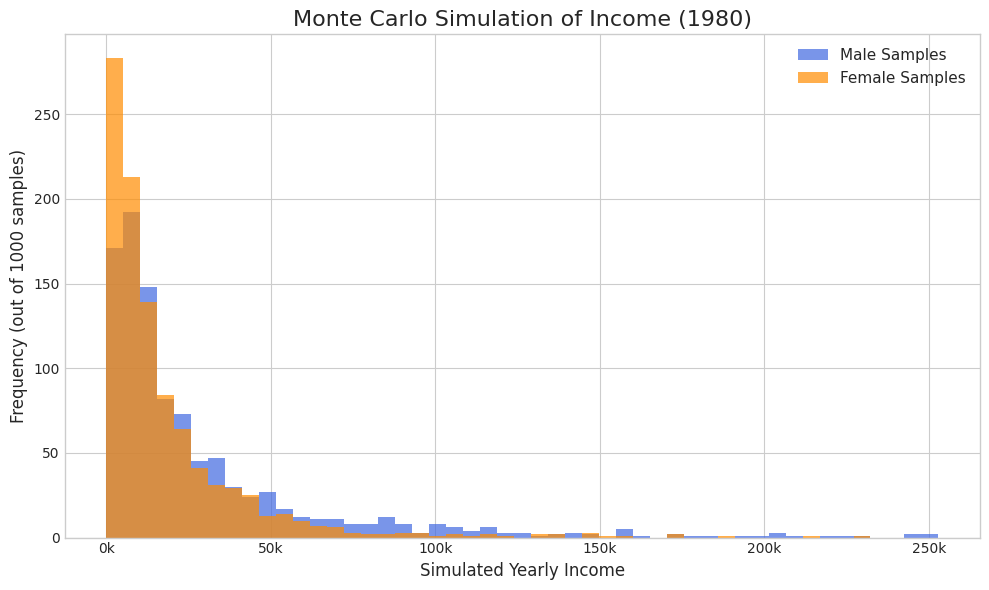

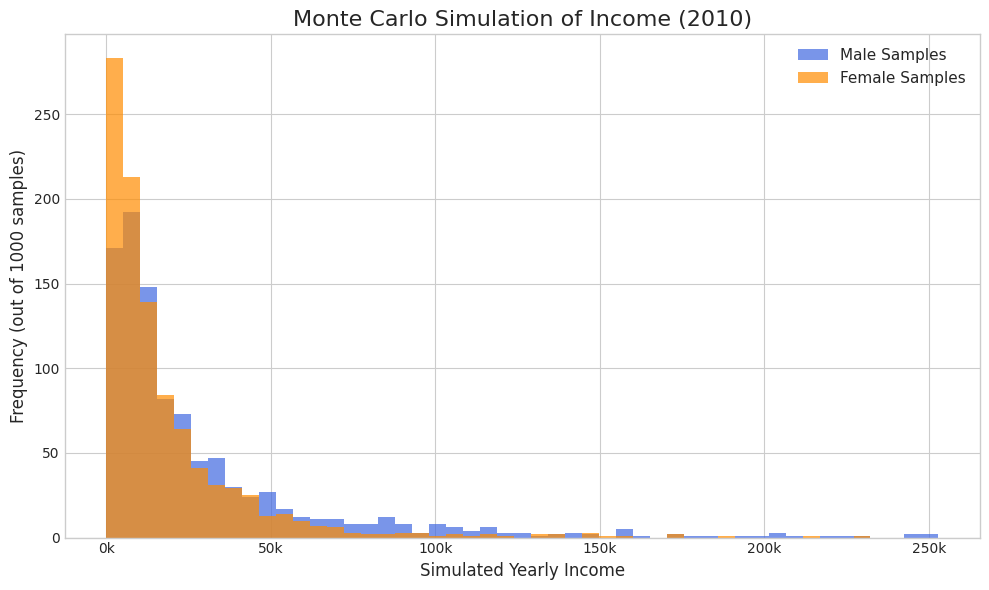

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Distribution Parameters ---
male_params = {'mu': 9.63992776, 'sigma': 1.20356296}
female_params = {'mu': 9.19455896, 'sigma': 1.20262693}
n_samples = 1000

# --- 2. Generate Monte Carlo Samples ---
# We use np.random.lognormal which takes mu (mean of the log) and sigma (std dev of the log) directly.
male_samples = np.random.lognormal(mean=male_params['mu'], sigma=male_params['sigma'], size=n_samples)
female_samples = np.random.lognormal(mean=female_params['mu'], sigma=female_params['sigma'], size=n_samples)

# --- 3. Calculate the Probability ---
# Count the number of times a male sample is greater than a female sample
male_earns_more_count = np.sum(male_samples > female_samples)
probability = male_earns_more_count / n_samples

print(f"Number of simulations: {n_samples}")
print(f"Times male earned more than female: {male_earns_more_count}")
print(f"Probability that a male earns more than a female: {probability:.1%}")

# --- 4. Plotting Function ---
def plot_histograms(year, male_data, female_data):
    """Generates and saves a histogram comparison plot for a given year."""
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define bins to ensure both histograms are comparable
    # We clip the view to the 99th percentile to avoid extreme outliers stretching the plot
    max_val = max(np.percentile(male_data, 99), np.percentile(female_data, 99))
    bins = np.linspace(0, max_val, 50)

    # Plot histograms with transparency
    ax.hist(male_data, bins=bins, alpha=0.7, label='Male Samples', color='royalblue')
    ax.hist(female_data, bins=bins, alpha=0.7, label='Female Samples', color='darkorange')

    # Customize plot
    ax.set_title(f'Monte Carlo Simulation of Income ({year})', fontsize=16)
    ax.set_xlabel('Simulated Yearly Income', fontsize=12)
    ax.set_ylabel('Frequency (out of 1000 samples)', fontsize=12)
    ax.legend(fontsize=11)

    # Format x-axis
    ax.get_xaxis().set_major_formatter(
        plt.FuncFormatter(lambda val, loc: f"{int(val/1000)}k")
    )
    
    plt.tight_layout()
    # You can uncomment the line below to save the figure to a file
    # plt.savefig(f'monte_carlo_histogram_{year}.png', dpi=300)
    plt.show()

# --- 5. Generate Plots for Both "Years" ---
# Note: The same sample data is used because the distributions are static.
plot_histograms(year='1980', male_data=male_samples, female_data=female_samples)
plot_histograms(year='2010', male_data=male_samples, female_data=female_samples)